In [94]:
# Importing the required libraries
import pandas as pd
import numpy as np 
import seaborn as sns
from pathlib import Path
import hvplot.pandas
import plotly.express as px
import matplotlib.pyplot as plt
import sqlalchemy


## Collage Education attainment 2008 by States, displaying the highest and lowest 5 sorted by Percentage.

In [95]:
# add data set for education 1) analyze highest 4 and lowest 4 2) visualize it 
educational_file = Path("./Resources/Educational attainment.csv")

educational_attainment_2008 = pd.read_csv(educational_file, index_col="State")

educational_attainment_2008 = educational_attainment_2008.sort_values(by="Percentage")

display(educational_attainment_2008.head())
display(educational_attainment_2008.tail())


,State Code,Percentage
State,,
West Virginia,WV,17.1
Arkansas,AR,18.8
Mississippi,MS,19.4
Kentucky,KY,19.7
Louisiana,LA,20.3


,State Code,Percentage
State,,
Maryland,MD,35.2
Colorado,CO,35.6
Connecticut,CT,35.6
Massachusetts,MA,38.1
D.C.,DC,48.2


In [96]:
fig = px.choropleth(educational_attainment_2008,
                    locations='State Code ',
                    locationmode="USA-states",
                    scope ="usa",
                    color='Percentage',
                    color_continuous_scale="jet_r",
                    
                   )
fig.show()

## Median HouseHold income from 2008-2018

In [97]:
# Reading the CSV file and displaying all the states from the file. 
file = Path("./Resources/median_household_income.csv")

median_household_income_df = pd.read_csv(file, index_col="State")

median_household_income_df.head()

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
State,,,,,,,,,,,
United States,"63,179","61,372","59,039","56,516","53,657","53,585","51,017","50,054","49,276","49,777","50,303"
Alabama,"49,936","51,113","47,221","44,509","42,278","47,320","43,464","42,590","40,933","39,980","44,476"
Alaska,"68,734","72,231","75,723","75,112","67,629","72,472","63,648","57,431","57,848","61,604","63,989"
Arizona,"62,283","61,125","57,100","52,248","49,254","52,611","47,044","48,621","46,896","45,739","46,914"
Arkansas,"49,781","48,829","45,907","42,798","44,922","39,376","39,018","41,302","38,587","36,538","39,586"


### Finding the Correlation, Covariance between Median household income 2008 and the Educational attainment 2008

In [98]:
median_data_2008 = median_household_income_df["2008"]

median_household_data_2008_df = pd.DataFrame(median_data_2008).rename(
    columns={"2008":"Median HouseHold Income 2008"})

median_household_data_2008_df = median_household_data_2008_df.replace(',', '', regex=True).astype(int)

median_household_data_2008_df.drop(median_household_data_2008_df.index[0],inplace=True)

median_household_data_2008_df.head()

,Median HouseHold Income 2008
State,
Alabama,44476
Alaska,63989
Arizona,46914
Arkansas,39586
California,57014


In [99]:
educational_household_2008_combined = pd.concat([median_household_data_2008_df,educational_attainment_2008],axis = 1)

educational_household_2008_combined.drop(columns="State Code ",inplace=True)

educational_household_2008_combined.head()

,Median HouseHold Income 2008,Percentage
State,,
Alabama,44476,22.0
Alaska,63989,27.3
Arizona,46914,25.1
Arkansas,39586,18.8
California,57014,29.6


/var/folders/s4/jx0c78ws3l5dmmqzzk0y30dc0000gn/T/ipykernel_4631/2364386501.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



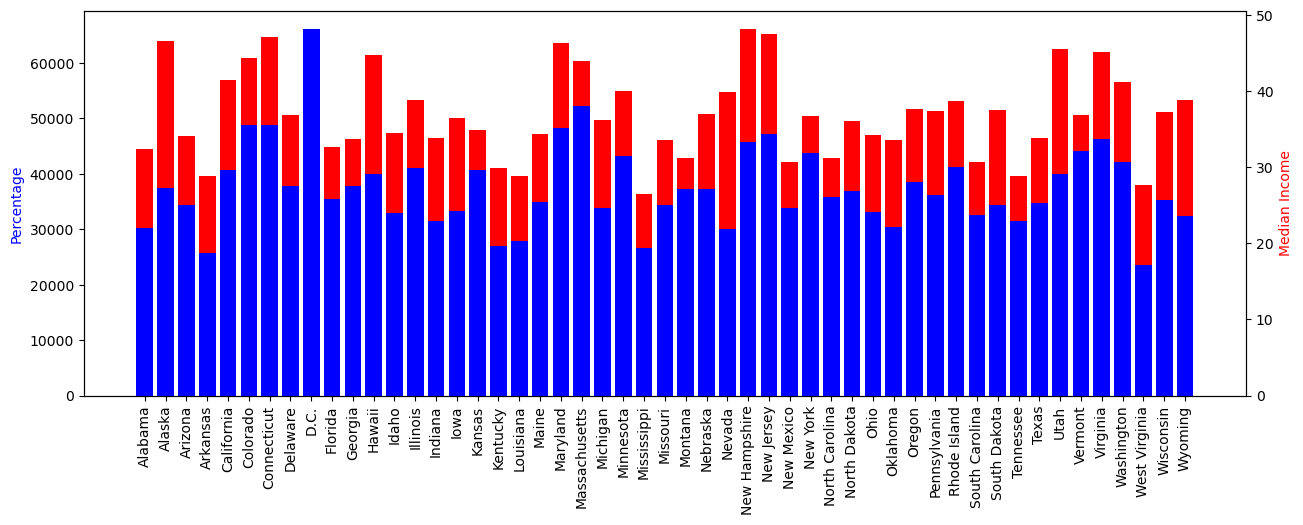

In [100]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()

ax1.bar(educational_household_2008_combined.index, educational_household_2008_combined["Median HouseHold Income 2008"], color='r')
ax2.bar(educational_household_2008_combined.index, educational_household_2008_combined["Percentage"], color='b')


ax1.set_ylabel('Percentage', color='b')
ax2.set_ylabel('Median Income', color='r')
ax1.set_xticklabels(educational_household_2008_combined.index, rotation=90)
plt.show()

### The Correlation between Educational attainment and Household Median income in 2008 

In [101]:
educational_household_2008_correlation = educational_household_2008_combined.corr()
educational_household_2008_correlation

,Median HouseHold Income 2008,Percentage
Median HouseHold Income 2008,1.00000,0.72823
Percentage,0.72823,1.00000


### Calculating and Visualizing the Median household income for the states with the highest and lowest Educational Attainment in 2008 

In [102]:
median_household_income = median_household_income_df.loc[["United States","D.C.","Massachusetts","Colorado","Maryland","Connecticut","West Virginia","Kentucky","Arkansas","Mississippi","Louisiana"]]

median_household_income = median_household_income.transpose().reset_index()


# Renaming the index to Years 
median_household_income= median_household_income.rename(columns={"index":"Years"}).set_index("Years")

# removing the dash sign from the numbers, changing the numbers to Integer, and then sorting the data by years. 
median_household_income = median_household_income.replace(',', '', regex=True).astype(int).sort_values(by="Years")

median_household_income

State,United States,D.C.,Massachusetts,Colorado,Maryland,Connecticut,West Virginia,Kentucky,Arkansas,Mississippi,Louisiana
Years,,,,,,,,,,,
2008,50303,55590,60320,60943,63711,64682,37994,41148,39586,36446,39563
2009,49777,53141,59373,55930,64186,64851,40490,42664,36538,35078,45433
2010,49276,56928,60934,60233,64201,65998,42777,41104,38587,38160,39300
2011,50054,55251,63313,58629,68876,65415,41821,39856,41302,41090,40658
2012,51017,65246,63656,57255,71836,64247,43553,41086,39018,36641,39085
2013,53585,60057,62529,67912,69353,69291,43069,44879,39376,32338,46425
2014,53657,68277,63151,60940,76165,70161,39552,42786,44922,35521,42406
2015,56516,70071,67861,66596,73594,72889,42824,42387,42798,40037,45922
2016,59039,70982,72266,70566,73760,75923,44354,45369,45907,41099,42196


### Displaying a visual for the 10 years Average median household income for the United States as a whole. 

In [103]:
# Displaying a visual for the 10 years Average median household income for the United States as a whole. 
us_median_household_income = median_household_income['United States']
us_median_household_income = pd.DataFrame(us_median_household_income)
us_median_household_income

,United States
Years,
2008,50303
2009,49777
2010,49276
2011,50054
2012,51017
2013,53585
2014,53657
2015,56516
2016,59039


In [104]:
us_median_household_income.hvplot.bar(
    title = "Average Median Household Income in the United States from 2008-2018",
    xlabel = "Years",
    ylabel = "Household Income",
    ylim = (47000,None))

:Bars   [Years]   (United States)

### Dropping the United States column from the data, then calculated and displayed the Visual in a bar plot for the 10 years average per state. We also displayed the change in 10 years per State.

In [105]:
states_household_median_income = median_household_income.drop(columns='United States')

states_household_median_income

State,D.C.,Massachusetts,Colorado,Maryland,Connecticut,West Virginia,Kentucky,Arkansas,Mississippi,Louisiana
Years,,,,,,,,,,
2008,55590,60320,60943,63711,64682,37994,41148,39586,36446,39563
2009,53141,59373,55930,64186,64851,40490,42664,36538,35078,45433
2010,56928,60934,60233,64201,65998,42777,41104,38587,38160,39300
2011,55251,63313,58629,68876,65415,41821,39856,41302,41090,40658
2012,65246,63656,57255,71836,64247,43553,41086,39018,36641,39085
2013,60057,62529,67912,69353,69291,43069,44879,39376,32338,46425
2014,68277,63151,60940,76165,70161,39552,42786,44922,35521,42406
2015,70071,67861,66596,73594,72889,42824,42387,42798,40037,45922
2016,70982,72266,70566,73760,75923,44354,45369,45907,41099,42196


In [106]:
average_10yrs_median_income = states_household_median_income.mean()
average_10yrs_median_income = pd.DataFrame(average_10yrs_median_income).rename(
    columns={0:"Average Median Income"}).sort_values(by="Average Median Income")
average_10yrs_median_income

,Average Median Income
State,
Mississippi,38421.090909
Arkansas,42422.181818
West Virginia,42945.363636
Louisiana,43169.454545
Kentucky,44289.272727
Colorado,64200.909091
D.C.,65879.545455
Massachusetts,66634.090909
Connecticut,69004.454545


<AxesSubplot:title={'center':' 10 Years Average Median Income'}, xlabel='State'>

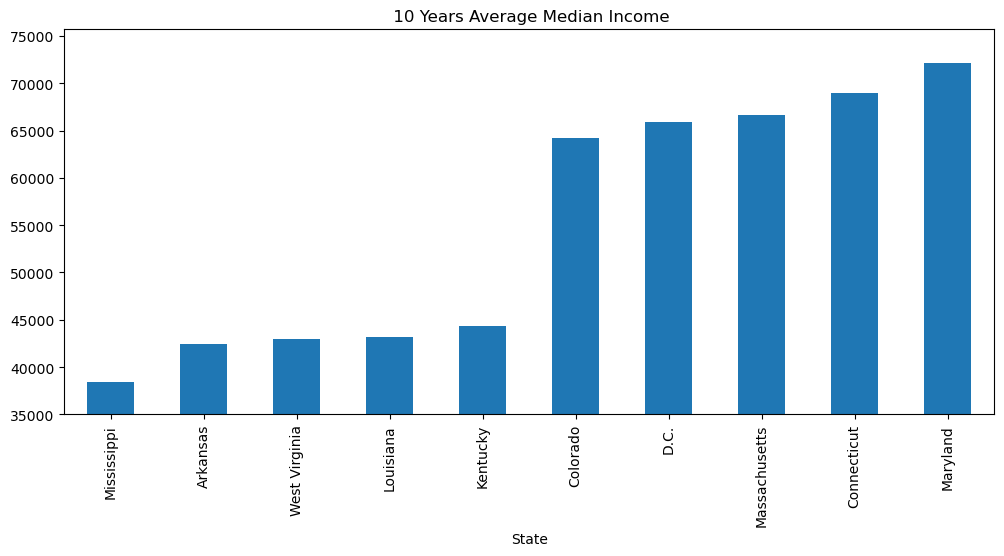

In [107]:
average_10yrs_median_income.plot.bar(
    figsize= (12,5),
    y="Average Median Income",
    legend=False, 
    title = " 10 Years Average Median Income",
    ylim = (35000,None)
)

In [108]:
states_household_median_income.hvplot(frame_height = 500, frame_width = 700, title = "States HouseHold income from 2008-2018" )

:NdOverlay   [State]
   :Curve   [Years]   (value)

## Mortgage Data per Capita 2008-2018

In [109]:
file = Path("./Resources/Mortgage_Data.csv")

mortgage_df = pd.read_csv(file, index_col="State")

mortgage_df.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
State,,,,,,,,,,,
Alaska,"39,940","39,320","39,210","34,020","39,860","39,440","39,170","40,470","40,940","41,580","41,960"
Alabama,"23,510","22,690","22,370","22,180","21,720","20,780","20,500","20,440","20,310","21,000","21,140"
Arkansas,"18,720","18,280","18,100","18,370","18,440","17,780","17,560","17,530","17,580","18,200","18,260"
Arizona,"50,220","45,540","40,860","38,000","34,800","33,150","33,070","33,000","33,370","35,680","36,690"
California,"70,100","65,460","60,330","57,220","54,400","51,290","51,850","51,190","51,890","54,640","55,920"


In [110]:
states_mortgage_df = mortgage_df.loc[["D.C.","Massachusetts","Colorado","Maryland","Connecticut","West Virginia","Kentucky","Arkansas","Mississippi","Louisiana"]]

states_mortgage_df  = states_mortgage_df.transpose().reset_index()


# Renaming the index to Years 
states_mortgage_df = states_mortgage_df.rename(columns={"index":"Years"}).set_index("Years")

# removing the dash sign from the numbers, changing the numbers to Integer, and then sorting the data by years. 
states_mortgage_df = states_mortgage_df .replace(',', '', regex=True).astype(int).sort_values(by="Years")






states_mortgage_df

State,D.C.,Massachusetts,Colorado,Maryland,Connecticut,West Virginia,Kentucky,Arkansas,Mississippi,Louisiana
Years,,,,,,,,,,
2008,59810,48040,54170,57890,47970,14870,21430,18720,15500,19410
2009,59720,46340,51430,55980,46880,14540,20980,18280,15310,19510
2010,58820,44880,48430,53830,46140,14850,20640,18100,15040,19580
2011,59390,44620,47370,53500,45910,14890,20500,18370,15120,19880
2012,58640,44060,45630,52640,44970,15100,20440,18440,15000,19870
2013,58370,43620,44850,50540,43260,14620,19610,17780,14430,19510
2014,58930,43260,45280,50300,42300,14720,19450,17560,14340,19640
2015,58760,43460,46050,49320,40990,14910,19540,17530,14530,20030
2016,59270,43910,47060,49070,41270,14850,19410,17580,14570,19950


In [111]:
average_10yrs_mortgage = states_mortgage_df.mean()
average_10yrs_mortgage = pd.DataFrame(average_10yrs_mortgage).rename(
    columns={0:"Average Mortgage"}).sort_values(by="Average Mortgage")

average_10yrs_mortgage

,Average Mortgage
State,
West Virginia,14910.909091
Mississippi,14980.000000
Arkansas,18074.545455
Louisiana,19980.000000
Kentucky,20168.181818
Connecticut,43950.909091
Massachusetts,45008.181818
Colorado,48583.636364
Maryland,52323.636364


<AxesSubplot:title={'center':'10 Years Average Mortgage'}, xlabel='State'>

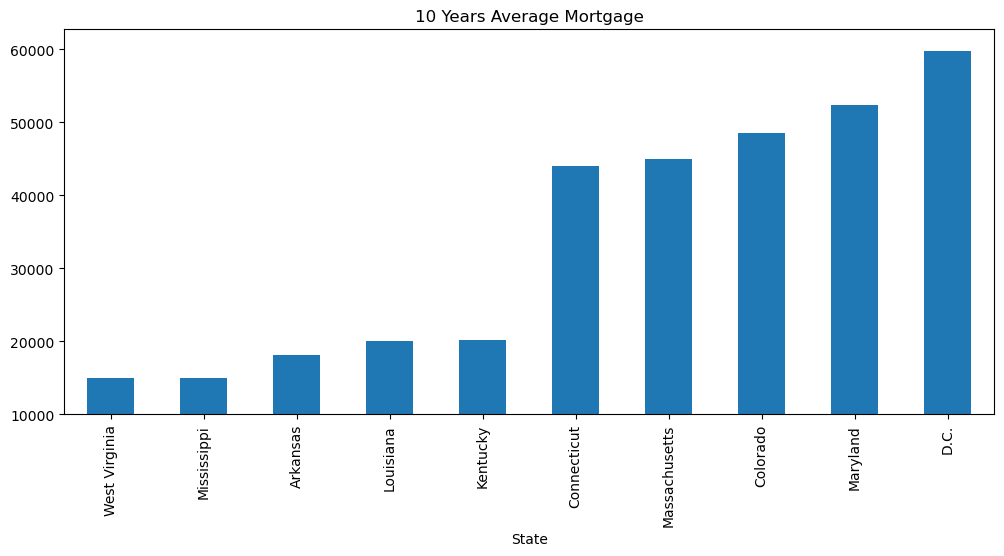

In [112]:
average_10yrs_mortgage.plot.bar(
    figsize= (12,5),
    y="Average Mortgage",
    legend=False,
    title = "10 Years Average Mortgage",
    ylim=(10000,None)
)

In [113]:
states_mortgage_df.hvplot(frame_height = 500, frame_width = 700, title = "States Mortgage per Capita from 2008-2018" )

:NdOverlay   [State]
   :Curve   [Years]   (value)

### Finding the Correlation, Covariance between Average Median household income and Average Mortage by State from 2008-2018

In [114]:
combined_average_income_and_mortgage_by_states = pd.concat(
    [average_10yrs_median_income,average_10yrs_mortgage],
    axis=1
)

combined_average_income_and_mortgage_by_states

,Average Median Income,Average Mortgage
State,,
Mississippi,38421.090909,14980.000000
Arkansas,42422.181818,18074.545455
West Virginia,42945.363636,14910.909091
Louisiana,43169.454545,19980.000000
Kentucky,44289.272727,20168.181818
Colorado,64200.909091,48583.636364
D.C.,65879.545455,59747.272727
Massachusetts,66634.090909,45008.181818
Connecticut,69004.454545,43950.909091


In [115]:
combined_average_income_and_mortgage_by_states.hvplot.bar(frame_height = 500, frame_width = 900, rot=90, xlabel="State")

:Bars   [State,Variable]   (value)

/var/folders/s4/jx0c78ws3l5dmmqzzk0y30dc0000gn/T/ipykernel_4631/1174445376.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



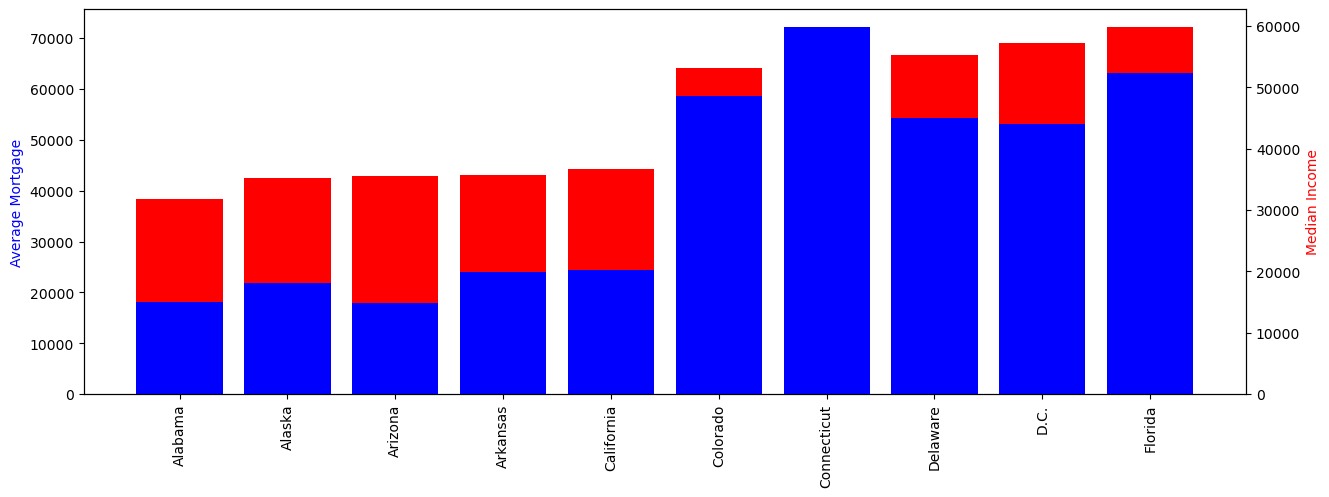

In [116]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()

ax1.bar(combined_average_income_and_mortgage_by_states.index, combined_average_income_and_mortgage_by_states["Average Median Income"], color='r')
ax2.bar(combined_average_income_and_mortgage_by_states.index, combined_average_income_and_mortgage_by_states["Average Mortgage"], color='b')


ax1.set_ylabel('Average Mortgage', color='b')
ax2.set_ylabel('Median Income', color='r')
ax1.set_xticklabels(educational_household_2008_combined.index, rotation=90)


plt.show()

### The Correlation between Household Mortgage and Household Median income from 2008-2018

In [117]:
correlation = combined_average_income_and_mortgage_by_states.corr()

correlation

,Average Median Income,Average Mortgage
Average Median Income,1.000000,0.953279
Average Mortgage,0.953279,1.000000


## Crime Rates per Data set 2008-2018

In [118]:
# Create a temporary SQLite database and populate the database with content after reading the .csv files
database_connection_string = 'sqlite:///'

# Create an engine to interact with the SQLite database
engine = sqlalchemy.create_engine(database_connection_string)

# Using header=0 in the read_csv was not capturing the column names for some reason. It would not read 
# the first line as the header of the file. Therefore, I am manually setting the column headers. 
columns=['State', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

# Read the unemployment rate .csv files. You must use index_col=False. Otherwise, no data will return.
unemployment_rate_df = pd.read_csv(
    Path('./Resources/states_table.csv'),
    index_col=False,
    names=columns
)

# Turn the dataframe into a table for joining purposes
unemployment_rate_df.to_sql('unemployment', engine, index=False, if_exists='replace')

unemployment_query = """
SELECT "State", '2008' as year, "2008" as unemployment_rate
FROM unemployment
WHERE "State" IN ('Mississippi', 'Arkansas', 'West Virginia', 'Louisiana', 'Kentucky', 'Colorado', 'District of Columbia', 'Massachusetts', 'Connecticut', 'Maryland')
UNION
SELECT "State", '2009' as year, "2009" as unemployment_rate
FROM unemployment
WHERE "State" IN ('Mississippi', 'Arkansas', 'West Virginia', 'Louisiana', 'Kentucky', 'Colorado', 'District of Columbia', 'Massachusetts', 'Connecticut', 'Maryland')
UNION
SELECT "State", '2010' as year, "2010" as unemployment_rate
FROM unemployment
WHERE "State" IN ('Mississippi', 'Arkansas', 'West Virginia', 'Louisiana', 'Kentucky', 'Colorado', 'District of Columbia', 'Massachusetts', 'Connecticut', 'Maryland')
UNION
SELECT "State", '2011' as year, "2011" as unemployment_rate
FROM unemployment
WHERE "State" IN ('Mississippi', 'Arkansas', 'West Virginia', 'Louisiana', 'Kentucky', 'Colorado', 'District of Columbia', 'Massachusetts', 'Connecticut', 'Maryland')
UNION
SELECT "State", '2012' as year, "2012" as unemployment_rate
FROM unemployment
WHERE "State" IN ('Mississippi', 'Arkansas', 'West Virginia', 'Louisiana', 'Kentucky', 'Colorado', 'District of Columbia', 'Massachusetts', 'Connecticut', 'Maryland')
UNION
SELECT "State", '2013' as year, "2013" as unemployment_rate
FROM unemployment
WHERE "State" IN ('Mississippi', 'Arkansas', 'West Virginia', 'Louisiana', 'Kentucky', 'Colorado', 'District of Columbia', 'Massachusetts', 'Connecticut', 'Maryland')
UNION
SELECT "State", '2014' as year, "2014" as unemployment_rate
FROM unemployment
WHERE "State" IN ('Mississippi', 'Arkansas', 'West Virginia', 'Louisiana', 'Kentucky', 'Colorado', 'District of Columbia', 'Massachusetts', 'Connecticut', 'Maryland')
UNION
SELECT "State", '2015' as year, "2015" as unemployment_rate
FROM unemployment
WHERE "State" IN ('Mississippi', 'Arkansas', 'West Virginia', 'Louisiana', 'Kentucky', 'Colorado', 'District of Columbia', 'Massachusetts', 'Connecticut', 'Maryland')
UNION
SELECT "State", '2016' as year, "2016" as unemployment_rate
FROM unemployment
WHERE "State" IN ('Mississippi', 'Arkansas', 'West Virginia', 'Louisiana', 'Kentucky', 'Colorado', 'District of Columbia', 'Massachusetts', 'Connecticut', 'Maryland')
UNION
SELECT "State", '2017' as year, "2017" as unemployment_rate
FROM unemployment
WHERE "State" IN ('Mississippi', 'Arkansas', 'West Virginia', 'Louisiana', 'Kentucky', 'Colorado', 'District of Columbia', 'Massachusetts', 'Connecticut', 'Maryland')
UNION
SELECT "State", '2018' as year, "2018" as unemployment_rate
FROM unemployment
WHERE "State" IN ('Mississippi', 'Arkansas', 'West Virginia', 'Louisiana', 'Kentucky', 'Colorado', 'District of Columbia', 'Massachusetts', 'Connecticut', 'Maryland')
ORDER BY 1
"""

# Run the query to reduce the data set 
unemployment_results = engine.execute(unemployment_query)

# Create a dataframe from the query
unemployment_df = pd.DataFrame(unemployment_results)

# Update the table to just have the reduced results
unemployment_df.to_sql('unemployment', engine, if_exists='replace')

columns=["State", "year", "unemployment_rate"]

unemployment_df.columns = columns

# Using header=0 in the read_csv was not capturing the column names for some reason. It would not read 
# the first line as the header of the file. Therefore, I am manually setting the column headers. 
columns=['State', 'year', 'Population', 'Total_Burglaries', 'Total_Larcenies', 'Total_Robberies']

# Read the state crime statistics .csv file
state_crime_df = pd.read_csv(
    Path('./Resources/state_crime.csv'),
    index_col=False,
    names=columns
)

# Turn the dataframe into a table for joining purposes
state_crime_df.to_sql('state_crime', engine)

crime_query = """
SELECT *
FROM state_crime
WHERE State IN ('Mississippi', 'Arkansas', 'West Virginia', 'Louisiana', 'Kentucky', 'Colorado', 'District of Columbia', 'Massachusetts', 'Connecticut', 'Maryland')
AND year between '2008' and '2018'
order by 1
"""

crime_results = engine.execute(crime_query)

crime_df = pd.DataFrame(crime_results)

# Update the table to just have the reduced results
crime_df.to_sql('state_crime', engine, if_exists='replace')

#columns=['State', 'year', 'Population', 'Total_Burglaries', 'Total_Larcenies', 'Total_Robberies']

#crime_df.columns = columns


columns=['State', 'year', 'Total_Burglaries', 'Total_Larcenies', 'Total_Robberies', 'Population', 'Unemployment_Rate', 'Total_unemployed']

# Read the state crime statistics .csv file
joined_df = pd.read_csv(
    Path('./Resources/join_table.csv'),
    index_col='State',
    names=columns
)

# Turn the dataframe into a table for joining purposes
joined_df.to_sql('join_table', engine, if_exists='replace')

join_query = """
SELECT *
FROM join_table
WHERE State IN ('Mississippi', 'Arkansas', 'West Virginia', 'Louisiana', 'Kentucky', 'Colorado', 'District of Columbia', 'Massachusetts', 'Connecticut', 'Maryland')
AND year between '2008' and '2018'
ORDER BY 1
"""

join_results = engine.execute(join_query)

join_df = pd.DataFrame(join_results)

# Update the table to just have the reduced results
join_df.to_sql('join_table', engine, if_exists='replace')

join_df.columns = columns

join_df[['Total_Burglaries']] = join_df[['Total_Burglaries']].apply(pd.to_numeric)

join_df[['Total_Larcenies']] = join_df[['Total_Larcenies']].apply(pd.to_numeric)

join_df[['Total_Robberies']] = join_df[['Total_Robberies']].apply(pd.to_numeric)

join_df[['Population']] = join_df[['Population']].apply(pd.to_numeric)

join_df[['Unemployment_Rate']] = join_df[['Unemployment_Rate']].apply(pd.to_numeric)

join_df[['Total_unemployed']] = join_df[['Total_unemployed']].apply(pd.to_numeric)

join_df.hvplot.line(frame_height = 400, frame_width = 700,x="year", xlabel='Analysis years: 2008 - 2018', y=['Total_Burglaries', 'Total_Larcenies', 'Total_Robberies', 'Total_unemployed'], 
                    value_label='Theft crimes/Total Unemployed', groupby='State', legend='right', 
                   title='Total unemployed in comparison to theft crimes').opts(yformatter='%.0f')

:DynamicMap   [State]
   :NdOverlay   [Variable]
      :Curve   [year]   (Theft crimes/Total Unemployed)

## Credit Card Data

In [119]:
credit_card_debt_df = pd.read_csv(
    Path('./Resources/Credit_Card_Debt_Per_Capita_UPDATED.csv'),
    index_col = 'State'
)

# Review the dataframe

display(credit_card_debt_df.head())
display(credit_card_debt_df.tail())

,Q4_2003,Q4_2004,Q4_2005,Q4_2006,Q4_2007,Q4_2008,Q4_2009,Q4_2010,Q4_2011,Q4_2012,Q4_2013,Q4_2014,Q4_2015,Q4_2016,Q4_2017,Q4_2018,Q4_2019,Q4_2020,Q4_2021
State,,,,,,,,,,,,,,,,,,,
AK,"4,260","4,430","4,440","4,510","4,850","4,810","4,540","4,180","4,060","3,980","3,820","3,830","3,920","4,110","4,270","4,350","4,440","3,900","4,070"
AL,"2,600","2,600","2,510","2,560","2,790","2,820","2,510","2,320","2,240","2,180","2,050","2,070","2,110","2,190","2,370","2,420","2,550","2,330","2,370"
AR,"2,430","2,460","2,520","2,540","2,720","2,730","2,390","2,180","2,120","2,060","1,970","1,990","2,050","2,150","2,300","2,410","2,530","2,300","2,380"
AZ,"3,110","3,170","2,970","3,100","3,590","3,990","3,740","3,270","3,060","2,930","2,740","2,740","2,810","2,930","3,140","3,310","3,460","3,030","3,060"
CA,"3,080","3,120","3,160","3,450","3,960","4,360","4,020","3,530","3,310","3,190","3,100","3,050","3,060","3,220","3,420","3,610","3,810","3,230","3,330"


,Q4_2003,Q4_2004,Q4_2005,Q4_2006,Q4_2007,Q4_2008,Q4_2009,Q4_2010,Q4_2011,Q4_2012,Q4_2013,Q4_2014,Q4_2015,Q4_2016,Q4_2017,Q4_2018,Q4_2019,Q4_2020,Q4_2021
State,,,,,,,,,,,,,,,,,,,
WA,"3,210","3,320","3,280","3,340","3,660","3,900","3,680","3,420","3,320","3,260","3,100","3,100","3,140","3,240","3,380","3,510","3,660","3,140","3,250"
WI,"2,510","2,620","2,810","2,850","3,130","3,250","3,020","2,750","2,650","2,510","2,380","2,420","2,440","2,530","2,630","2,660","2,770","2,450","2,510"
WV,"2,530","2,640","2,430","2,520","2,700","2,780","2,530","2,320","2,230","2,040","1,910","1,960","2,040","2,160","2,240","2,240","2,390","2,210","2,250"
WY,"3,040","3,060","3,060","3,010","3,350","3,440","3,220","2,880","2,820","2,670","2,620","2,620","2,700","2,800","2,960","3,000","3,130","2,800","2,930"
allUS,"2,960","3,040","3,060","3,170","3,490","3,670","3,370","3,050","2,950","2,850","2,710","2,730","2,800","2,930","3,100","3,220","3,390","2,970","3,060"


## Filter out the years, displaying only the data from 2008-2018

In [120]:
# Remove unnecessary years from the credit_card_debt dataframe
# Only need data from 2008-2018
# Drop columns 2003-2007 & 2019-2021

credit_card_debt_df = credit_card_debt_df.drop(credit_card_debt_df.columns[[0,1,2,3,4,16,17,18]], axis = 1)

# Review the dataframe

display(credit_card_debt_df.head())
display(credit_card_debt_df.tail())

,Q4_2008,Q4_2009,Q4_2010,Q4_2011,Q4_2012,Q4_2013,Q4_2014,Q4_2015,Q4_2016,Q4_2017,Q4_2018
State,,,,,,,,,,,
AK,"4,810","4,540","4,180","4,060","3,980","3,820","3,830","3,920","4,110","4,270","4,350"
AL,"2,820","2,510","2,320","2,240","2,180","2,050","2,070","2,110","2,190","2,370","2,420"
AR,"2,730","2,390","2,180","2,120","2,060","1,970","1,990","2,050","2,150","2,300","2,410"
AZ,"3,990","3,740","3,270","3,060","2,930","2,740","2,740","2,810","2,930","3,140","3,310"
CA,"4,360","4,020","3,530","3,310","3,190","3,100","3,050","3,060","3,220","3,420","3,610"


,Q4_2008,Q4_2009,Q4_2010,Q4_2011,Q4_2012,Q4_2013,Q4_2014,Q4_2015,Q4_2016,Q4_2017,Q4_2018
State,,,,,,,,,,,
WA,"3,900","3,680","3,420","3,320","3,260","3,100","3,100","3,140","3,240","3,380","3,510"
WI,"3,250","3,020","2,750","2,650","2,510","2,380","2,420","2,440","2,530","2,630","2,660"
WV,"2,780","2,530","2,320","2,230","2,040","1,910","1,960","2,040","2,160","2,240","2,240"
WY,"3,440","3,220","2,880","2,820","2,670","2,620","2,620","2,700","2,800","2,960","3,000"
allUS,"3,670","3,370","3,050","2,950","2,850","2,710","2,730","2,800","2,930","3,100","3,220"


## Drop all 'NaN' values from the credit_card_debt_df DataFrame

In [121]:
# Drop rows with 'NaN' values

credit_card_debt_df = credit_card_debt_df.dropna()

## Narrow down the median_household_income_df DataFrame to 10 states/areas

In [122]:
# Narrow down the median_household_income_df data to 10 areas into a new dataframe
# Include the top 5 states: D.C., MA, CO, MD, CT
# Include the bottom 5 states: WV, KY, AK, MS, LA

median_household_income = median_household_income_df.loc[['United States', 'D.C.', 'Massachusetts', 'Colorado',
                                                          'Maryland', 'Connecticut', 'West Virginia', 'Kentucky',
                                                          'Arkansas', 'Mississippi', 'Louisiana']]

# Display the new dataframe

median_household_income

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
State,,,,,,,,,,,
United States,"63,179","61,372","59,039","56,516","53,657","53,585","51,017","50,054","49,276","49,777","50,303"
D.C.,"85,750","83,382","70,982","70,071","68,277","60,057","65,246","55,251","56,928","53,141","55,590"
Massachusetts,"86,345","73,227","72,266","67,861","63,151","62,529","63,656","63,313","60,934","59,373","60,320"
Colorado,"73,034","74,172","70,566","66,596","60,940","67,912","57,255","58,629","60,233","55,930","60,943"
Maryland,"86,223","81,084","73,760","73,594","76,165","69,353","71,836","68,876","64,201","64,186","63,711"
Connecticut,"72,812","72,780","75,923","72,889","70,161","69,291","64,247","65,415","65,998","64,851","64,682"
West Virginia,"50,573","45,392","44,354","42,824","39,552","43,069","43,553","41,821","42,777","40,490","37,994"
Kentucky,"54,555","51,348","45,369","42,387","42,786","44,879","41,086","39,856","41,104","42,664","41,148"
Arkansas,"49,781","48,829","45,907","42,798","44,922","39,376","39,018","41,302","38,587","36,538","39,586"


In [123]:
# Reorganize the 'columns' in median_household_income dataframe from '2018...2008' to '2008...2018'

median_household_income = median_household_income[['2008','2009','2010','2011',
                                                   '2012','2013','2014','2015',
                                                   '2016','2017','2018']]

median_household_income

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
State,,,,,,,,,,,
United States,"50,303","49,777","49,276","50,054","51,017","53,585","53,657","56,516","59,039","61,372","63,179"
D.C.,"55,590","53,141","56,928","55,251","65,246","60,057","68,277","70,071","70,982","83,382","85,750"
Massachusetts,"60,320","59,373","60,934","63,313","63,656","62,529","63,151","67,861","72,266","73,227","86,345"
Colorado,"60,943","55,930","60,233","58,629","57,255","67,912","60,940","66,596","70,566","74,172","73,034"
Maryland,"63,711","64,186","64,201","68,876","71,836","69,353","76,165","73,594","73,760","81,084","86,223"
Connecticut,"64,682","64,851","65,998","65,415","64,247","69,291","70,161","72,889","75,923","72,780","72,812"
West Virginia,"37,994","40,490","42,777","41,821","43,553","43,069","39,552","42,824","44,354","45,392","50,573"
Kentucky,"41,148","42,664","41,104","39,856","41,086","44,879","42,786","42,387","45,369","51,348","54,555"
Arkansas,"39,586","36,538","38,587","41,302","39,018","39,376","44,922","42,798","45,907","48,829","49,781"


In [125]:
median_household_income

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
State,,,,,,,,,,,
United States,"50,303","49,777","49,276","50,054","51,017","53,585","53,657","56,516","59,039","61,372","63,179"
D.C.,"55,590","53,141","56,928","55,251","65,246","60,057","68,277","70,071","70,982","83,382","85,750"
Massachusetts,"60,320","59,373","60,934","63,313","63,656","62,529","63,151","67,861","72,266","73,227","86,345"
Colorado,"60,943","55,930","60,233","58,629","57,255","67,912","60,940","66,596","70,566","74,172","73,034"
Maryland,"63,711","64,186","64,201","68,876","71,836","69,353","76,165","73,594","73,760","81,084","86,223"
Connecticut,"64,682","64,851","65,998","65,415","64,247","69,291","70,161","72,889","75,923","72,780","72,812"
West Virginia,"37,994","40,490","42,777","41,821","43,553","43,069","39,552","42,824","44,354","45,392","50,573"
Kentucky,"41,148","42,664","41,104","39,856","41,086","44,879","42,786","42,387","45,369","51,348","54,555"
Arkansas,"39,586","36,538","38,587","41,302","39,018","39,376","44,922","42,798","45,907","48,829","49,781"


In [126]:
# Continue to clean up the median_household_income dataframe for analysis

# Reset the index
median_household_income = median_household_income.transpose().reset_index()

# Rename the index to 'Years'
median_household_income = median_household_income.rename(columns = {'index':'Years'}).set_index('Years')

# Remove the commas, change the type to 'integer', and sort the values
median_household_income = median_household_income.replace(',', '', regex = True).astype(int).sort_values(by = 'Years')

# Display the dataframe
median_household_income

State,United States,D.C.,Massachusetts,Colorado,Maryland,Connecticut,West Virginia,Kentucky,Arkansas,Mississippi,Louisiana
Years,,,,,,,,,,,
2008,50303,55590,60320,60943,63711,64682,37994,41148,39586,36446,39563
2009,49777,53141,59373,55930,64186,64851,40490,42664,36538,35078,45433
2010,49276,56928,60934,60233,64201,65998,42777,41104,38587,38160,39300
2011,50054,55251,63313,58629,68876,65415,41821,39856,41302,41090,40658
2012,51017,65246,63656,57255,71836,64247,43553,41086,39018,36641,39085
2013,53585,60057,62529,67912,69353,69291,43069,44879,39376,32338,46425
2014,53657,68277,63151,60940,76165,70161,39552,42786,44922,35521,42406
2015,56516,70071,67861,66596,73594,72889,42824,42387,42798,40037,45922
2016,59039,70982,72266,70566,73760,75923,44354,45369,45907,41099,42196


## Narrow down the credit_card_debt_df DataFrame to the exact same 10 states

In [127]:
# Narrow down the credit_card_debt_df data to 10 areas into a new dataframe
# Include the top 5 areas: D.C., MA, CO, MD, CT
# Include the bottom 5 areas: WV, KY, AK, MS, LA

credit_card_debt = credit_card_debt_df.loc[[' allUS ', ' DC ', ' MA ', ' CO ', ' MD ', ' CT ', ' WV ',
                                            ' KY ', ' AK ', ' MS ', ' LA ']]


# Display the new dataframe

credit_card_debt

,Q4_2008,Q4_2009,Q4_2010,Q4_2011,Q4_2012,Q4_2013,Q4_2014,Q4_2015,Q4_2016,Q4_2017,Q4_2018
State,,,,,,,,,,,
allUS,"3,670","3,370","3,050","2,950","2,850","2,710","2,730","2,800","2,930","3,100","3,220"
DC,"3,850","3,580","3,410","3,370","3,410","3,310","3,470","3,600","3,780","3,920","4,180"
MA,"4,110","3,780","3,430","3,360","3,320","3,170","3,180","3,260","3,340","3,490","3,600"
CO,"4,450","4,090","3,720","3,560","3,440","3,220","3,230","3,250","3,380","3,530","3,670"
MD,"4,030","3,760","3,490","3,420","3,400","3,240","3,320","3,430","3,560","3,780","3,910"
CT,"4,210","3,830","3,540","3,510","3,490","3,350","3,370","3,460","3,540","3,730","3,870"
WV,"2,780","2,530","2,320","2,230","2,040","1,910","1,960","2,040","2,160","2,240","2,240"
KY,"2,760","2,500","2,350","2,250","2,150","2,040","2,080","2,100","2,180","2,280","2,330"
AK,"4,810","4,540","4,180","4,060","3,980","3,820","3,830","3,920","4,110","4,270","4,350"


In [128]:
# Get rid of the 'Q4_' in the column names and leave just the year

credit_card_debt.columns = [col.replace('Q4_','') for col in credit_card_debt.columns]

# Display the dataframe

credit_card_debt

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
State,,,,,,,,,,,
allUS,"3,670","3,370","3,050","2,950","2,850","2,710","2,730","2,800","2,930","3,100","3,220"
DC,"3,850","3,580","3,410","3,370","3,410","3,310","3,470","3,600","3,780","3,920","4,180"
MA,"4,110","3,780","3,430","3,360","3,320","3,170","3,180","3,260","3,340","3,490","3,600"
CO,"4,450","4,090","3,720","3,560","3,440","3,220","3,230","3,250","3,380","3,530","3,670"
MD,"4,030","3,760","3,490","3,420","3,400","3,240","3,320","3,430","3,560","3,780","3,910"
CT,"4,210","3,830","3,540","3,510","3,490","3,350","3,370","3,460","3,540","3,730","3,870"
WV,"2,780","2,530","2,320","2,230","2,040","1,910","1,960","2,040","2,160","2,240","2,240"
KY,"2,760","2,500","2,350","2,250","2,150","2,040","2,080","2,100","2,180","2,280","2,330"
AK,"4,810","4,540","4,180","4,060","3,980","3,820","3,830","3,920","4,110","4,270","4,350"


In [129]:
# Continue to clean up the credit_card_debt dataframe for analysis

# Reset the index
credit_card_debt = credit_card_debt.transpose().reset_index()

# Rename the index to 'Years'
credit_card_debt = credit_card_debt.rename(columns = {'index':'Years'}).set_index('Years')

# Remove the commas, change the type to 'integer', and sort the values
credit_card_debt = credit_card_debt.replace(',', '', regex=True).astype(int).sort_values(by = 'Years')

# Display the dataframe
credit_card_debt

State,allUS,DC,MA,CO,MD,CT,WV,KY,AK,MS,LA
Years,,,,,,,,,,,
2008,3670,3850,4110,4450,4030,4210,2780,2760,4810,2320,2630
2009,3370,3580,3780,4090,3760,3830,2530,2500,4540,2060,2420
2010,3050,3410,3430,3720,3490,3540,2320,2350,4180,1820,2230
2011,2950,3370,3360,3560,3420,3510,2230,2250,4060,1760,2190
2012,2850,3410,3320,3440,3400,3490,2040,2150,3980,1740,2170
2013,2710,3310,3170,3220,3240,3350,1910,2040,3820,1650,2050
2014,2730,3470,3180,3230,3320,3370,1960,2080,3830,1650,2090
2015,2800,3600,3260,3250,3430,3460,2040,2100,3920,1740,2180
2016,2930,3780,3340,3380,3560,3540,2160,2180,4110,1850,2270


In [130]:
# Adjust the column names so it matches the columns in the median_household_income DataFrame

columns_credit_card = ['United States', 'D.C.', 'Massachusetts', 'Colorado', 'Maryland', 'Connecticut', 'West Virginia', 'Kentucky',
                       'Arkansas', 'Mississippi', 'Louisiana']
credit_card_debt.columns = columns_credit_card

credit_card_debt

,United States,D.C.,Massachusetts,Colorado,Maryland,Connecticut,West Virginia,Kentucky,Arkansas,Mississippi,Louisiana
Years,,,,,,,,,,,
2008,3670,3850,4110,4450,4030,4210,2780,2760,4810,2320,2630
2009,3370,3580,3780,4090,3760,3830,2530,2500,4540,2060,2420
2010,3050,3410,3430,3720,3490,3540,2320,2350,4180,1820,2230
2011,2950,3370,3360,3560,3420,3510,2230,2250,4060,1760,2190
2012,2850,3410,3320,3440,3400,3490,2040,2150,3980,1740,2170
2013,2710,3310,3170,3220,3240,3350,1910,2040,3820,1650,2050
2014,2730,3470,3180,3230,3320,3370,1960,2080,3830,1650,2090
2015,2800,3600,3260,3250,3430,3460,2040,2100,3920,1740,2180
2016,2930,3780,3340,3380,3560,3540,2160,2180,4110,1850,2270


In [131]:
# Notice the 'Years' index in credit_card_debt dataframe are out of order
# It goes from 2016 to 2018 to 2017

# Check the index
credit_card_debt.index

Index([' 2008 ', ' 2009 ', ' 2010 ', ' 2011 ', ' 2012 ', ' 2013 ', ' 2014 ',
       ' 2015 ', ' 2016 ', ' 2018 ', '2017'],
      dtype='object', name='Years')

In [132]:
# Get rid of the white spaces in the index
credit_card_debt.index = credit_card_debt.index.str.strip()

# Check the index
credit_card_debt.index

Index(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2018', '2017'],
      dtype='object', name='Years')

In [133]:
# Sort the 'Years' again to get it in numerical order
credit_card_debt = credit_card_debt.sort_values(by = "Years")

credit_card_debt

,United States,D.C.,Massachusetts,Colorado,Maryland,Connecticut,West Virginia,Kentucky,Arkansas,Mississippi,Louisiana
Years,,,,,,,,,,,
2008,3670,3850,4110,4450,4030,4210,2780,2760,4810,2320,2630
2009,3370,3580,3780,4090,3760,3830,2530,2500,4540,2060,2420
2010,3050,3410,3430,3720,3490,3540,2320,2350,4180,1820,2230
2011,2950,3370,3360,3560,3420,3510,2230,2250,4060,1760,2190
2012,2850,3410,3320,3440,3400,3490,2040,2150,3980,1740,2170
2013,2710,3310,3170,3220,3240,3350,1910,2040,3820,1650,2050
2014,2730,3470,3180,3230,3320,3370,1960,2080,3830,1650,2090
2015,2800,3600,3260,3250,3430,3460,2040,2100,3920,1740,2180
2016,2930,3780,3340,3380,3560,3540,2160,2180,4110,1850,2270


## Visualize the 2 DataFrames

In [134]:
display(median_household_income.hvplot(
    title = 'Median Household Income (2008-2018)',
    height = 500,
    width = 700))

display(credit_card_debt.hvplot(
    title = 'Credit Card Debt per Capita (2008-2018)',
    height = 500,
    width = 700))


:NdOverlay   [State]
   :Curve   [Years]   (value)

:NdOverlay   [Variable]
   :Curve   [Years]   (value)

## Visualize the median_household_income and credit_card_debt across the entire United States

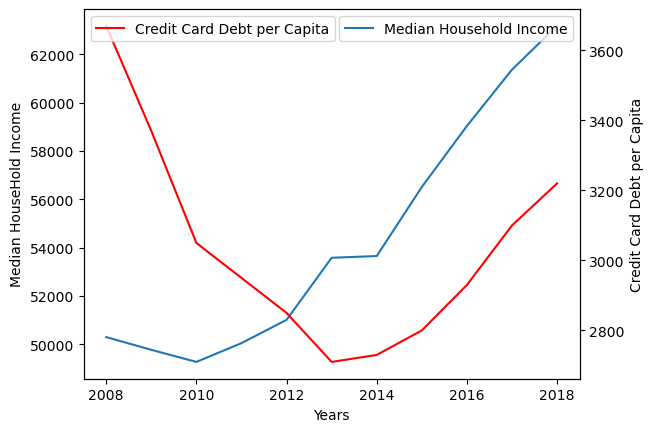

In [135]:
# Plot the data for 'United States' from both dataframes onto a single chart

ax1 = median_household_income['United States'].plot(
    xlabel = 'Years',
    ylabel = 'Median HouseHold Income',
    kind = 'line')

ax2 = ax1.twinx()
credit_card_debt['United States'].plot(
    xlabel = 'Years',
    ylabel = 'Credit Card Debt per Capita',
    kind = 'line',
    ax = ax2, color = 'red')

ax1.legend(['Median Household Income'], loc = 'upper right')
ax2.legend(['Credit Card Debt per Capita'], loc = 'upper left')

plt.show()

## Analyze the correlation between Median Household Income and Credit Card Debt per Capita across the United States

In [136]:
# Isolate the 'United States' columns in both dataframes 

median_household_income_usa = median_household_income['United States']
credit_card_debt_usa = credit_card_debt['United States']

# Concatenate the data 

income_debt_usa = pd.concat([median_household_income_usa, credit_card_debt_usa], axis = 1)

# Display the concatenated dataframe

income_debt_usa

,United States,United States
Years,,
2008,50303,3670
2009,49777,3370
2010,49276,3050
2011,50054,2950
2012,51017,2850
2013,53585,2710
2014,53657,2730
2015,56516,2800
2016,59039,2930


In [137]:
# Rename the columns
columns_usa = ['Median Household Income USA', 'Credit Card Debt USA']
income_debt_usa.columns = columns_usa

# Review the concatenated dataframe
income_debt_usa

,Median Household Income USA,Credit Card Debt USA
Years,,
2008,50303,3670
2009,49777,3370
2010,49276,3050
2011,50054,2950
2012,51017,2850
2013,53585,2710
2014,53657,2730
2015,56516,2800
2016,59039,2930


In [138]:
# Determine the correlation
correlation_income_debt_usa = income_debt_usa.corr()

display(correlation_income_debt_usa)

print("The correlation between the median household income and credit card debt per capita in the United States from 2008 t0 2013 is -0.112887. "
      "It is a slightly negative weak correlation.")

,Median Household Income USA,Credit Card Debt USA
Median Household Income USA,1.000000,-0.112887
Credit Card Debt USA,-0.112887,1.000000


The correlation between the median household income and credit card debt per capita in the United States from 2008 t0 2013 is -0.112887. It is a slightly negative weak correlation.


In [139]:
# Break the timeframe down
# Credit card debt per capita fell from 2008 to 2013
# Analyze the correlation between 2008 to 2013

# Narrow down the timeframe in the dataframe
income_debt_usa_2008_2013 = income_debt_usa.iloc[:6]

# Review the dataframe from 2008 to 2013
display(income_debt_usa_2008_2013)

# Find the correlation during this time period
correlation_usa_2008_2013 = income_debt_usa_2008_2013.corr()

display(correlation_usa_2008_2013)

print("The correlation between median household income and credit card debt per capita in the U.S.A from 2008 to 2013 was -0.549564.")

,Median Household Income USA,Credit Card Debt USA
Years,,
2008,50303,3670
2009,49777,3370
2010,49276,3050
2011,50054,2950
2012,51017,2850
2013,53585,2710


,Median Household Income USA,Credit Card Debt USA
Median Household Income USA,1.000000,-0.549564
Credit Card Debt USA,-0.549564,1.000000


The correlation between median household income and credit card debt per capita in the U.S.A from 2008 to 2013 was -0.549564.


In [140]:
# Analyze the correlation between 2013-2018
# Note that 2013 is the year that credit card debt per capita bottomed out and started to push back up

# Narrow down the timeframe
income_debt_usa_2013_2018 = income_debt_usa.iloc[5:]

# Display the dataframe
display(income_debt_usa_2013_2018)

# Find the correlation during this time period
correlation_usa_2013_2018 = income_debt_usa_2013_2018.corr()

display(correlation_usa_2013_2018)

print("The correlation from 2013 to 2018 is 0.985206. The correlation not only turned from negative to positive "
      "but it shows a strong positve linear relationship between median household income and credit card debt per capita from 2013 to 2018.")

,Median Household Income USA,Credit Card Debt USA
Years,,
2013,53585,2710
2014,53657,2730
2015,56516,2800
2016,59039,2930
2017,61372,3100
2018,63179,3220


,Median Household Income USA,Credit Card Debt USA
Median Household Income USA,1.000000,0.985206
Credit Card Debt USA,0.985206,1.000000


The correlation from 2013 to 2018 is 0.985206. The correlation not only turned from negative to positive but it shows a strong positve linear relationship between median household income and credit card debt per capita from 2013 to 2018.


## Drop 'United States' column from both DataFrames to focus on the 10 selected states

In [141]:
# Drop the overall U.S. datapoint to just look at the states for median_household_income

states_household_median_income = median_household_income.drop(columns = 'United States')

# Display the dataframe

states_household_median_income

State,D.C.,Massachusetts,Colorado,Maryland,Connecticut,West Virginia,Kentucky,Arkansas,Mississippi,Louisiana
Years,,,,,,,,,,
2008,55590,60320,60943,63711,64682,37994,41148,39586,36446,39563
2009,53141,59373,55930,64186,64851,40490,42664,36538,35078,45433
2010,56928,60934,60233,64201,65998,42777,41104,38587,38160,39300
2011,55251,63313,58629,68876,65415,41821,39856,41302,41090,40658
2012,65246,63656,57255,71836,64247,43553,41086,39018,36641,39085
2013,60057,62529,67912,69353,69291,43069,44879,39376,32338,46425
2014,68277,63151,60940,76165,70161,39552,42786,44922,35521,42406
2015,70071,67861,66596,73594,72889,42824,42387,42798,40037,45922
2016,70982,72266,70566,73760,75923,44354,45369,45907,41099,42196


In [142]:
# Drop the overall U.S. datapoint to just look at the states for credit_card_debt

states_credit_card_debt = credit_card_debt.drop(columns = 'United States')

# Display the dataframe

states_credit_card_debt

,D.C.,Massachusetts,Colorado,Maryland,Connecticut,West Virginia,Kentucky,Arkansas,Mississippi,Louisiana
Years,,,,,,,,,,
2008,3850,4110,4450,4030,4210,2780,2760,4810,2320,2630
2009,3580,3780,4090,3760,3830,2530,2500,4540,2060,2420
2010,3410,3430,3720,3490,3540,2320,2350,4180,1820,2230
2011,3370,3360,3560,3420,3510,2230,2250,4060,1760,2190
2012,3410,3320,3440,3400,3490,2040,2150,3980,1740,2170
2013,3310,3170,3220,3240,3350,1910,2040,3820,1650,2050
2014,3470,3180,3230,3320,3370,1960,2080,3830,1650,2090
2015,3600,3260,3250,3430,3460,2040,2100,3920,1740,2180
2016,3780,3340,3380,3560,3540,2160,2180,4110,1850,2270


## Analyze the data for Arkansas

In [143]:
# Isolate the 'Arkansas' column in the dataframes
arkansas_income = states_household_median_income['Arkansas']
arkansas_debt = states_credit_card_debt['Arkansas']

# Concatenate the data
arkansas_income_debt = pd.concat([arkansas_income, arkansas_debt], axis = 1)

# Fix the columns
columns_arkansas = ['Median Household Income in Arkansas', 'Credit Card Debt per Capita in Arkansas']
arkansas_income_debt.columns = columns_arkansas

# Display the concatenated dataframe
display(arkansas_income_debt)

# Find the correlation
correlation_arkansas = arkansas_income_debt.corr()

display(correlation_arkansas)

print("From 2008 to 2018, the correlation is -0.10248. Compared to the correlation of the entire USA which is -0.112887, the difference is small.")

,Median Household Income in Arkansas,Credit Card Debt per Capita in Arkansas
Years,,
2008,39586,4810
2009,36538,4540
2010,38587,4180
2011,41302,4060
2012,39018,3980
2013,39376,3820
2014,44922,3830
2015,42798,3920
2016,45907,4110


,Median Household Income in Arkansas,Credit Card Debt per Capita in Arkansas
Median Household Income in Arkansas,1.00000,-0.10248
Credit Card Debt per Capita in Arkansas,-0.10248,1.00000


From 2008 to 2018, the correlation is -0.10248. Compared to the correlation of the entire USA which is -0.112887, the difference is small.


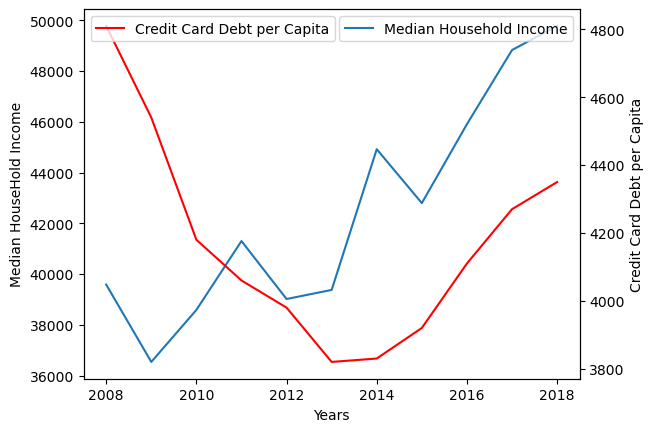

In [144]:
# Plot the data for 'Arkansas' from both dataframes onto a single chart

ax1 = median_household_income['Arkansas'].plot(
    xlabel = 'Years',
    ylabel = 'Median HouseHold Income',
    kind = 'line')

ax2 = ax1.twinx()
credit_card_debt['Arkansas'].plot(
    xlabel = 'Years',
    ylabel = 'Credit Card Debt per Capita',
    kind = 'line',
    ax = ax2, color = 'red')

ax1.legend(['Median Household Income'], loc = 'upper right')
ax2.legend(['Credit Card Debt per Capita'], loc = 'upper left')

plt.show()

In [145]:
# Analayze the data from 2008 to 2013

# Narrow down the timeframe
income_debt_arkansas_2008_2013 = arkansas_income_debt.iloc[:6]

# Display the dataframe
display(income_debt_arkansas_2008_2013)

# Find the correlation during this time period
correlation_arkansas_2008_2013 = income_debt_arkansas_2008_2013.corr()

display(correlation_arkansas_2008_2013)

print("The correlation for Arkansas from 2008 to 2013 is -0.330403. This shows a relatiely weak negative relationship.")


,Median Household Income in Arkansas,Credit Card Debt per Capita in Arkansas
Years,,
2008,39586,4810
2009,36538,4540
2010,38587,4180
2011,41302,4060
2012,39018,3980
2013,39376,3820


,Median Household Income in Arkansas,Credit Card Debt per Capita in Arkansas
Median Household Income in Arkansas,1.000000,-0.330403
Credit Card Debt per Capita in Arkansas,-0.330403,1.000000


The correlation for Arkansas from 2008 to 2013 is -0.330403. This shows a relatiely weak negative relationship.


In [146]:
# Analayze the data from 2013 to 2018

# Narrow down the timeframe
income_debt_arkansas_2013_2018 = arkansas_income_debt.iloc[5:]

# Display the dataframe
display(income_debt_arkansas_2013_2018)

# Find the correlation during this time period
correlation_arkansas_2013_2018 = income_debt_arkansas_2013_2018.corr()

display(correlation_arkansas_2013_2018)

print("The correlation for Arkansas from 2013 to 2018 is 0.892807. The correlation for the entire U.S.A during that time period was 0.985. "
      "While the correlation for Arkansas is weaker compared to the correlation for the U.S.A as a whole, it still indicates a strong positive "
      "relationship.")

,Median Household Income in Arkansas,Credit Card Debt per Capita in Arkansas
Years,,
2013,39376,3820
2014,44922,3830
2015,42798,3920
2016,45907,4110
2017,48829,4270
2018,49781,4350


,Median Household Income in Arkansas,Credit Card Debt per Capita in Arkansas
Median Household Income in Arkansas,1.000000,0.892807
Credit Card Debt per Capita in Arkansas,0.892807,1.000000


The correlation for Arkansas from 2013 to 2018 is 0.892807. The correlation for the entire U.S.A during that time period was 0.985. While the correlation for Arkansas is weaker compared to the correlation for the U.S.A as a whole, it still indicates a strong positive relationship.


## Analyze the data for Mississippi

In [147]:
# Isolate the 'Mississippi' column in the dataframes
mississippi_income = states_household_median_income['Mississippi']
mississippi_debt = states_credit_card_debt['Mississippi']

# Concatenate the data
mississippi_income_debt = pd.concat([mississippi_income, mississippi_debt], axis = 1)

# Fix the columns
columns_mississippi = ['Median Household Income in Mississippi', 'Credit Card Debt per Capita in Mississippi']
mississippi_income_debt.columns = columns_mississippi

# Display the concatenated dataframe
display(mississippi_income_debt)

# Find the correlation
correlation_mississippi = mississippi_income_debt.corr()

display(correlation_mississippi)

print("The correlation for Mississippi from 2008 to 2018 is 0.255237 whereas the correlations for both Arkansas and the entire U.S.A were "
      "negative during this time period.")

,Median Household Income in Mississippi,Credit Card Debt per Capita in Mississippi
Years,,
2008,36446,2320
2009,35078,2060
2010,38160,1820
2011,41090,1760
2012,36641,1740
2013,32338,1650
2014,35521,1650
2015,40037,1740
2016,41099,1850


,Median Household Income in Mississippi,Credit Card Debt per Capita in Mississippi
Median Household Income in Mississippi,1.000000,0.255237
Credit Card Debt per Capita in Mississippi,0.255237,1.000000


The correlation for Mississippi from 2008 to 2018 is 0.255237 whereas the correlations for both Arkansas and the entire U.S.A were negative during this time period.


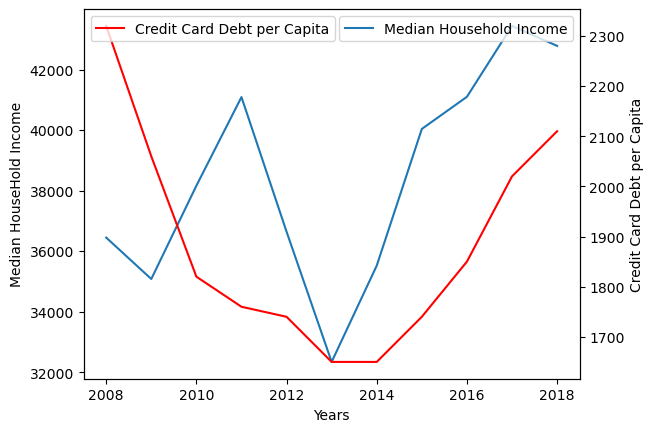

In [148]:
# Plot the data for 'Mississippi' from both dataframes onto a single chart

ax1 = median_household_income['Mississippi'].plot(
    xlabel = 'Years',
    ylabel = 'Median HouseHold Income',
    kind = 'line')

ax2 = ax1.twinx()
credit_card_debt['Mississippi'].plot(
    xlabel = 'Years',
    ylabel = 'Credit Card Debt per Capita',
    kind = 'line',
    ax = ax2, color = 'red')

ax1.legend(['Median Household Income'], loc = 'upper right')
ax2.legend(['Credit Card Debt per Capita'], loc = 'upper left')

plt.show()

In [149]:
# Analayze the data from 2008 to 2013

# Narrow down the timeframe
income_debt_mississippi_2008_2013 = mississippi_income_debt.iloc[:6]

# Display the dataframe
display(income_debt_mississippi_2008_2013)

# Find the correlation during this time period
correlation_mississippi_2008_2013 = income_debt_mississippi_2008_2013.corr()

display(correlation_mississippi_2008_2013)

print("The correlation in Mississippi from 2008 to 2013 is -0.000375 which is basically zero. This is no correlation here between "
      "median household income and credit card debt per capita in Mississippi during this time period whereas Arkansas and the whole U.S.A "
      "showed much stronger negative correlation during this period.")

,Median Household Income in Mississippi,Credit Card Debt per Capita in Mississippi
Years,,
2008,36446,2320
2009,35078,2060
2010,38160,1820
2011,41090,1760
2012,36641,1740
2013,32338,1650


,Median Household Income in Mississippi,Credit Card Debt per Capita in Mississippi
Median Household Income in Mississippi,1.000000,-0.000375
Credit Card Debt per Capita in Mississippi,-0.000375,1.000000


The correlation in Mississippi from 2008 to 2013 is -0.000375 which is basically zero. This is no correlation here between median household income and credit card debt per capita in Mississippi during this time period whereas Arkansas and the whole U.S.A showed much stronger negative correlation during this period.


In [150]:
# Analayze the data from 2013 to 2018

# Narrow down the timeframe
income_debt_mississippi_2013_2018 = mississippi_income_debt.iloc[5:]

# Display the dataframe
display(income_debt_mississippi_2013_2018)

# Find the correlation during this time period
correlation_mississippi_2013_2018 = income_debt_mississippi_2013_2018.corr()

display(correlation_mississippi_2013_2018)

print("The correlation in Mississippi from 2013 to 2018 does show a rather strong positive linear relationship between median household "
      "income and credit card debt per capita where as the median household income increases, so does credit card debt. It should be "
      "noted that the correlation here is not as strong compared to Arkansas or the U.S.A as a whole.")

,Median Household Income in Mississippi,Credit Card Debt per Capita in Mississippi
Years,,
2013,32338,1650
2014,35521,1650
2015,40037,1740
2016,41099,1850
2017,43441,2020
2018,42781,2110


,Median Household Income in Mississippi,Credit Card Debt per Capita in Mississippi
Median Household Income in Mississippi,1.00000,0.86575
Credit Card Debt per Capita in Mississippi,0.86575,1.00000


The correlation in Mississippi from 2013 to 2018 does show a rather strong positive linear relationship between median household income and credit card debt per capita where as the median household income increases, so does credit card debt. It should be noted that the correlation here is not as strong compared to Arkansas or the U.S.A as a whole.
